In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
EUmatch = pd.read_csv("/course/data/a2/games/EUmatch.csv")

In [5]:
EUmatch.shape

(5771, 20)

In [6]:
EUmatch.columns

Index(['d_spell', 'f_spell', 'champion', 'side', 'assists',
       'damage_objectives', 'damage_building', 'damage_turrets', 'deaths',
       'kda', 'kills', 'level', 'time_cc', 'damage_taken', 'turret_kills',
       'vision_score', 'damage_total', 'gold_earned', 'role',
       'minions_killed'],
      dtype='object')

In [7]:
EUmatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5771 entries, 0 to 5770
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   d_spell            5483 non-null   float64
 1   f_spell            5477 non-null   float64
 2   champion           5520 non-null   object 
 3   side               5507 non-null   object 
 4   assists            5463 non-null   float64
 5   damage_objectives  5477 non-null   float64
 6   damage_building    5507 non-null   float64
 7   damage_turrets     5499 non-null   float64
 8   deaths             5479 non-null   float64
 9   kda                5489 non-null   float64
 10  kills              5494 non-null   float64
 11  level              5502 non-null   float64
 12  time_cc            5474 non-null   float64
 13  damage_taken       5473 non-null   float64
 14  turret_kills       5508 non-null   float64
 15  vision_score       5491 non-null   float64
 16  damage_total       5771 

# Calculate kda by formula

In [8]:
#Calculate kda by formula.
for i in range(len(EUmatch)):
    # Check kda is nan or not, if it is nan, 
    # Then, check if kills, assists and deaths are nan, if all of them are not nan,
    # use formula to calculate.
    if EUmatch['kda'].isnull()[i]: 
        if not EUmatch['kills'].isnull()[i]:
            if not EUmatch['assists'].isnull()[i]:
                if not EUmatch['deaths'].isnull()[i]:
                    if EUmatch['deaths'][i]!=0:
                        EUmatch['kda'][i]=(EUmatch['kills'][i] + EUmatch['assists'][i])/ EUmatch['deaths'][i]
                    else:
                        EUmatch['kda'][i]=(EUmatch['kills'][i] + EUmatch['assists'][i])

/tmp/ipykernel_34/3927925887.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EUmatch['kda'][i]=(EUmatch['kills'][i] + EUmatch['assists'][i])/ EUmatch['deaths'][i]
/tmp/ipykernel_34/3927925887.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EUmatch['kda'][i]=(EUmatch['kills'][i] + EUmatch['assists'][i])


In [9]:
EUmatch, test = train_test_split(EUmatch, test_size=0.33, random_state=1)

In [10]:
print(EUmatch.shape)
print(test.shape)

(3866, 20)
(1905, 20)


# Delete all nan and inf in the EUmatch dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3866 entries, 2475 to 5157
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   d_spell            3680 non-null   float64
 1   f_spell            3665 non-null   float64
 2   champion           3694 non-null   object 
 3   side               3695 non-null   object 
 4   assists            3664 non-null   float64
 5   damage_objectives  3664 non-null   float64
 6   damage_building    3692 non-null   float64
 7   damage_turrets     3680 non-null   float64
 8   deaths             3679 non-null   float64
 9   kda                3836 non-null   float64
 10  kills              3679 non-null   float64
 11  level              3687 non-null   float64
 12  time_cc            3660 non-null   float64
 13  damage_taken       3668 non-null   float64
 14  turret_kills       3682 non-null   float64
 15  vision_score       3674 non-null   float64
 16  damage_total       38

,d_spell,f_spell,champion,side,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,level,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned,role,minions_killed
2475,12.0,4.0,Ziggs,Side.red,1.0,14475.0,15349.0,14475.0,11.0,0.090909,0.0,14.0,15.0,22169.0,2.0,11.0,163261,10219,Other,Many
4857,4.0,11.0,LeeSin,Side.red,16.0,2208.0,31622.0,2208.0,3.0,8.333333,9.0,16.0,24.0,43169.0,1.0,38.0,163631,12731,TopLane_Jungle,Few
3913,4.0,11.0,LeeSin,Side.red,10.0,0.0,41063.0,0.0,8.0,2.750000,12.0,18.0,32.0,64380.0,0.0,46.0,239483,16297,TopLane_Jungle,Few
3631,4.0,11.0,LeeSin,Side.red,5.0,0.0,26321.0,0.0,4.0,3.000000,7.0,13.0,11.0,27269.0,0.0,28.0,125802,10320,TopLane_Jungle,Few
4625,4.0,14.0,Yasuo,Side.blue,5.0,0.0,923.0,0.0,6.0,1.333333,3.0,14.0,14.0,18463.0,NaN,18.0,165394,9971,Other,Many
4149,11.0,4.0,Khazix,Side.red,12.0,3316.0,34171.0,3316.0,12.0,2.166667,14.0,18.0,13.0,46961.0,1.0,54.0,214956,19416,TopLane_Jungle,Few
3655,11.0,4.0,Zed,Side.blue,9.0,968.0,36745.0,968.0,5.0,3.600000,9.0,16.0,6.0,24416.0,3.0,27.0,209609,13551,TopLane_Jungle,Few
619,11.0,4.0,LeeSin,NaN,10.0,2728.0,21128.0,2728.0,1.0,21.000000,11.0,14.0,18.0,22374.0,2.0,18.0,129389,11500,TopLane_Jungle,Few
2150,4.0,12.0,Vex,Side.blue,NaN,542.0,2643.0,542.0,11.0,1.272727,5.0,14.0,44.0,31822.0,NaN,21.0,131291,10973,Other,Many
4088,11.0,NaN,Rumble,Side.blue,12.0,2553.0,30186.0,2553.0,7.0,3.714286,14.0,17.0,15.0,35848.0,1.0,NaN,208072,15566,TopLane_Jungle,Few


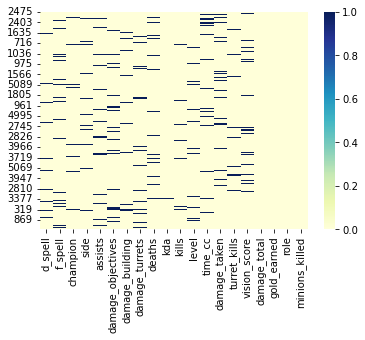

In [11]:
import seaborn as sb
sb.heatmap(EUmatch.isnull(),cmap="YlGnBu")

#check null values
EUmatch.isnull().sum()
EUmatch.drop_duplicates()
EUmatch.info()
EUmatch.head(10)
#cDelete all nan in the EUmatch dataset
#EUmatch.replace([np.inf, -np.inf], np.nan, inplace=True)
#eu=EUmatch.dropna()

In [12]:
#drop all NaN values in kda
eu = EUmatch.dropna(how='all', subset=['kda'])
eu.isnull().sum()

d_spell              183
f_spell              201
champion             171
side                 167
assists              192
damage_objectives    200
damage_building      173
damage_turrets       184
deaths               174
kda                    0
kills                179
level                178
time_cc              204
damage_taken         195
turret_kills         183
vision_score         190
damage_total           0
gold_earned            0
role                   0
minions_killed         0
dtype: int64

In [13]:
#delete catergoryical data
#modify_data = modify_data.fillna(modify_data.mean())
#modify_data= modify_data.dropna()
#modify_data.head(5)
eu = eu.dropna(how='any',
                subset=['side', 'champion'])
eu.isnull().sum()
eu=eu.fillna(eu.median())
print(eu.isnull().sum())
eu.info()
#check if has inf value
eu.isin([np.inf, -np.inf])
eu.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
eu.dropna(inplace=True)
eu.info()

d_spell              0
f_spell              0
champion             0
side                 0
assists              0
damage_objectives    0
damage_building      0
damage_turrets       0
deaths               0
kda                  0
kills                0
level                0
time_cc              0
damage_taken         0
turret_kills         0
vision_score         0
damage_total         0
gold_earned          0
role                 0
minions_killed       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3507 entries, 2475 to 5157
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   d_spell            3507 non-null   float64
 1   f_spell            3507 non-null   float64
 2   champion           3507 non-null   object 
 3   side               3507 non-null   object 
 4   assists            3507 non-null   float64
 5   damage_objectives  3507 non-null   float64
 6   damage_building    3507 non-

/tmp/ipykernel_34/2575563691.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  eu=eu.fillna(eu.median())


**Role**

<AxesSubplot:ylabel='role'>

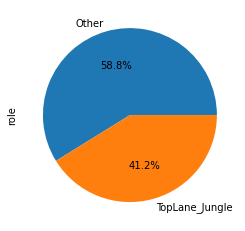

In [14]:
(eu.groupby('role')['role'].count()).plot.pie(autopct='%1.1f%%')

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='role', ylabel='count'>

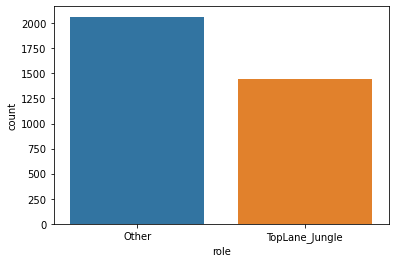

In [15]:
sns.countplot('role',data=eu)

**Side**

In [16]:
side_count=(eu.groupby(['side','role'])['role'].count())

In [17]:
side_count

side       role          
Side.blue  Other             1062
           TopLane_Jungle     736
Side.red   Other             1001
           TopLane_Jungle     708
Name: role, dtype: int64

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='side', ylabel='count'>

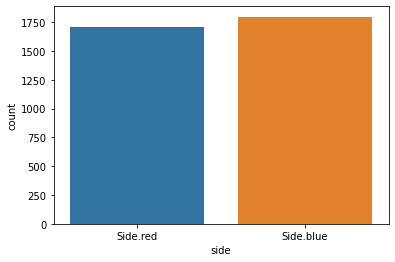

In [18]:
sns.countplot('side',data=eu)

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='side', ylabel='count'>

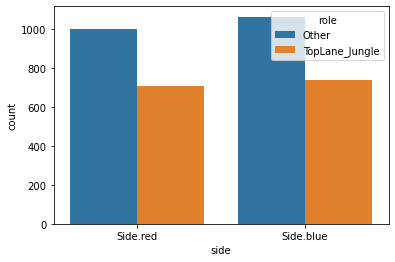

In [19]:
sns.countplot('side',hue='role',data=eu)

In [20]:
minions_killed_count=(eu.groupby(['minions_killed','role'])['role'].count())

In [21]:
minions_killed_count

minions_killed  role          
Few             Other              722
                TopLane_Jungle     765
Many            Other             1341
                TopLane_Jungle     679
Name: role, dtype: int64

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='minions_killed', ylabel='count'>

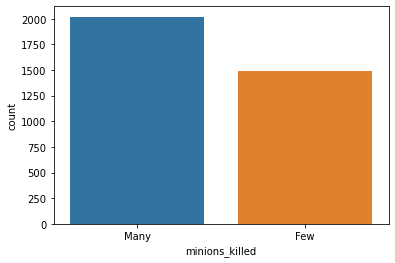

In [22]:
sns.countplot('minions_killed',data=eu)

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='minions_killed', ylabel='count'>

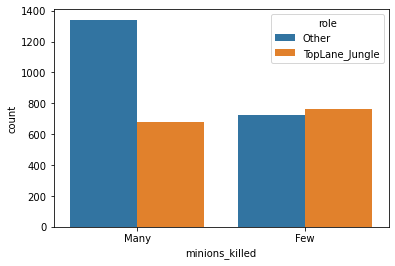

In [23]:
sns.countplot('minions_killed',hue='role',data=eu)

# Convert category variable to factor

In [24]:
# convert category variable to factor
eu['role']=eu['role'].replace({'Other':0})
eu['role']=eu['role'].replace({'TopLane_Jungle':1})
eu[['side', 'champion','minions_killed']] = eu[['side','champion','minions_killed']].apply(lambda x: pd.factorize(x)[0])

<AxesSubplot:ylabel='role'>

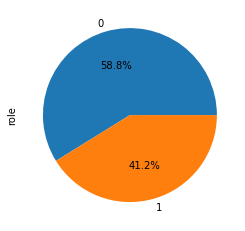

In [25]:
(eu.groupby('role')['role'].count()).plot.pie(autopct='%1.1f%%')

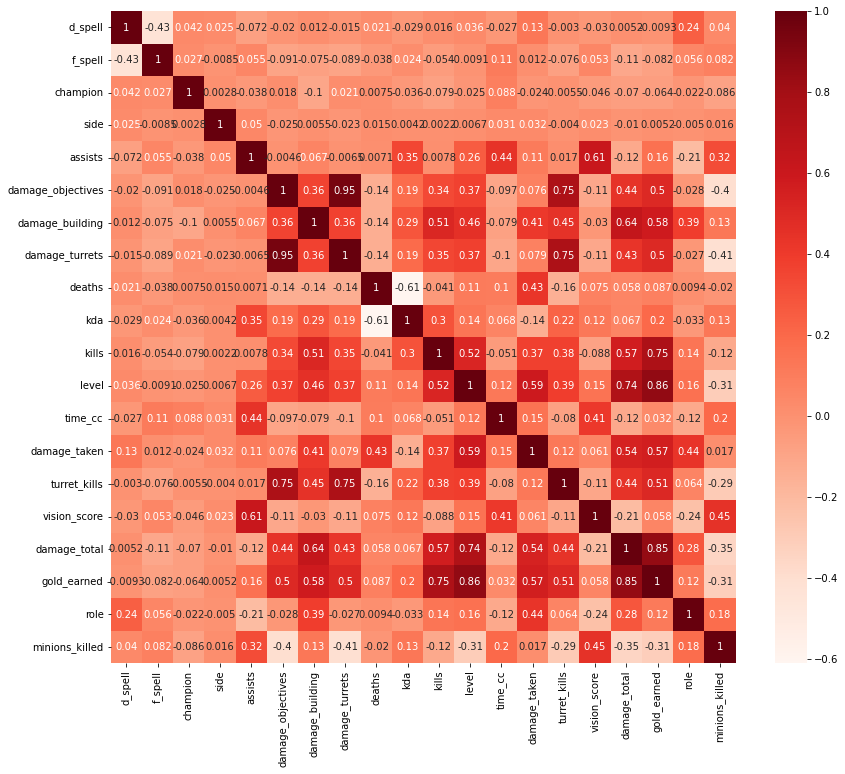

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(14,12))
cor = eu.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Feature Selection - Chi-square test


In [27]:
y_train = eu['role']
X_train = eu.drop(columns=['role'])
print('Train', X_train.shape, y_train.shape)

Train (3507, 19) (3507,)


In [28]:
features = X_train
class_label = y_train
ALPHA = 0.05

In [29]:
import scipy.stats as stats

from scipy.stats import chi2_contingency
filtered_features = []

for feature in (X_train.columns):
    cont_table = pd.crosstab(class_label, features[feature])
    chi2_val, p, dof, expected = stats.chi2_contingency(cont_table.values, correction=False)
    
    print(f'Chi2 value for feature "{feature}": {chi2_val:.4f}')
    
    if(p < ALPHA): 
        filtered_features.append(feature)
        print(f'Reject the Null Hypothesis for feature "{feature}", p-value {p:.4f}\n')
    else:
        print(f'Fail to reject the Null Hypothesis for feature "{feature}", p-value {p:.4f}\n')
        
print('Feature set after filtering with Chi-square test:', filtered_features)

Chi2 value for feature "d_spell": 752.7948
Reject the Null Hypothesis for feature "d_spell", p-value 0.0000

Chi2 value for feature "f_spell": 898.2108
Reject the Null Hypothesis for feature "f_spell", p-value 0.0000

Chi2 value for feature "champion": 2658.0764
Reject the Null Hypothesis for feature "champion", p-value 0.0000

Chi2 value for feature "side": 0.0881
Fail to reject the Null Hypothesis for feature "side", p-value 0.7667

Chi2 value for feature "assists": 181.0202
Reject the Null Hypothesis for feature "assists", p-value 0.0000

Chi2 value for feature "damage_objectives": 2266.2332
Fail to reject the Null Hypothesis for feature "damage_objectives", p-value 0.3335

Chi2 value for feature "damage_building": 3087.4220
Reject the Null Hypothesis for feature "damage_building", p-value 0.0199

Chi2 value for feature "damage_turrets": 2293.3911
Fail to reject the Null Hypothesis for feature "damage_turrets", p-value 0.2618

Chi2 value for feature "deaths": 21.7954
Fail to reject 

In [30]:
from sklearn import preprocessing
X_train=X_train[filtered_features]
# X_scale=preprocessing.normalize(X_fs)

# Preprocessing test data

In [31]:
test.drop_duplicates()

test = test.dropna(how='all', subset=['kda'])
test.isnull().sum()

test = test.dropna(how='any',
                subset=['side', 'champion'])
test=test.fillna(test.median())
print(test.isnull().sum())
test.info()
#check if has inf value
test.isin([np.inf, -np.inf])
test.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
test.dropna(inplace=True)
test.info()

d_spell              0
f_spell              0
champion             0
side                 0
assists              0
damage_objectives    0
damage_building      0
damage_turrets       0
deaths               0
kda                  0
kills                0
level                0
time_cc              0
damage_taken         0
turret_kills         0
vision_score         0
damage_total         0
gold_earned          0
role                 0
minions_killed       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1721 entries, 3710 to 368
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   d_spell            1721 non-null   float64
 1   f_spell            1721 non-null   float64
 2   champion           1721 non-null   object 
 3   side               1721 non-null   object 
 4   assists            1721 non-null   float64
 5   damage_objectives  1721 non-null   float64
 6   damage_building    1721 non-n

/tmp/ipykernel_34/1010060874.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test=test.fillna(test.median())


# category variable to factor

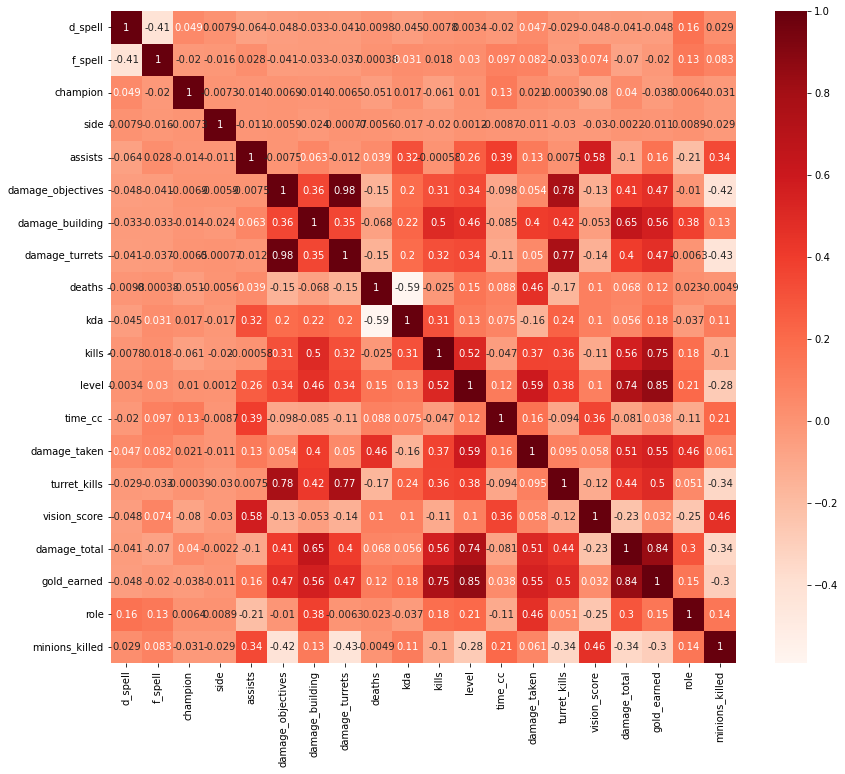

In [32]:
test['role']=test['role'].replace({'Other':0})
test['role']=test['role'].replace({'TopLane_Jungle':1})
test[['side', 'champion','minions_killed']] = test[['side', 'champion','minions_killed']].apply(lambda x: pd.factorize(x)[0])
plt.figure(figsize=(14,12))
cor = test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Chi-square test

In [33]:
y_test = test['role']
X_test = test.drop(columns=['role'])
print('Train', X_test.shape, y_test.shape)

"y_test = test['role']\nX_test = test.drop(columns=['role'])\nprint('Train', X_test.shape, y_test.shape)"

In [34]:
features_test = X_test
class_label_test = y_test
ALPHA = 0.05

'features_test = X_test\nclass_label_test = y_test\nALPHA = 0.05'

In [35]:
filtered_features_test = []

for feature in (X_test.columns):
    cont_table = pd.crosstab(class_label_test, features_test[feature])
    chi2_val, p, dof, expected = stats.chi2_contingency(cont_table.values, correction=False)
    
    print(f'Chi2 value for feature "{feature}": {chi2_val:.4f}')
    
    if(p < ALPHA): 
        filtered_features_test.append(feature)
        print(f'Reject the Null Hypothesis for feature "{feature}", p-value {p:.4f}\n')
    else:
        print(f'Fail to reject the Null Hypothesis for feature "{feature}", p-value {p:.4f}\n')
        
print('Feature set after filtering with Chi-square test:', filtered_features_test)

'filtered_features_test = []\n\nfor feature in (X_test.columns):\n    cont_table = pd.crosstab(class_label_test, features_test[feature])\n    chi2_val, p, dof, expected = stats.chi2_contingency(cont_table.values, correction=False)\n    \n    print(f\'Chi2 value for feature "{feature}": {chi2_val:.4f}\')\n    \n    if(p < ALPHA): \n        filtered_features_test.append(feature)\n        print(f\'Reject the Null Hypothesis for feature "{feature}", p-value {p:.4f}\n\')\n    else:\n        print(f\'Fail to reject the Null Hypothesis for feature "{feature}", p-value {p:.4f}\n\')\n        \nprint(\'Feature set after filtering with Chi-square test:\', filtered_features_test)'

In [36]:
X_test=test[filtered_features]
y_test = test['role']

# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
# Create and fit knn with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit to the train dataset
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
# Note that we're calculating the accuracy score for the test data
y_pred_knn = knn.predict(X_test)

accuracy = knn.score(X_test, y_test)
print('Accuracy', accuracy)

Accuracy 0.6124346310284718


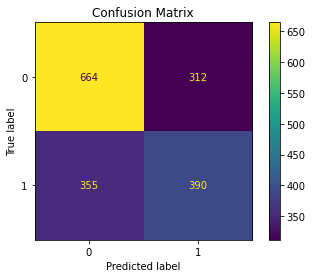

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion matrix (variable name)
cm = confusion_matrix(y_test, # test data
                      y_pred_knn, # predictions
                      labels=[0,1] # class labels from the knn model
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm, # pass through the created confusion matrix
                              display_labels=[0,1] # class labels from the knn model 
                             )

disp.plot()

plt.title("Confusion Matrix")
plt.show()

In [40]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:",metrics.precision_score(y_test, y_pred_knn))
print("Recall:",metrics.recall_score(y_test, y_pred_knn))
precision_knn = metrics.precision_score(y_test, y_pred_knn)
recall_knn = metrics.recall_score(y_test, y_pred_knn)
f1_knn=(2*precision_knn*recall_knn)/(precision_knn+recall_knn)
print("F1:",f1_knn)

Accuracy: 0.6124346310284718
Precision: 0.5555555555555556
Recall: 0.5234899328859061
F1: 0.5390463026952315


In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

AUC：0.6516971063923425


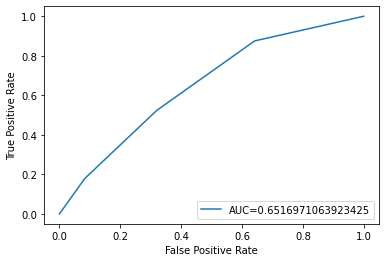

In [42]:
#AUC
y_pred_proba_knn = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_knn)
auc_knn = metrics.roc_auc_score(y_test, y_pred_proba_knn)
print("AUC："+str(auc_knn))

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_knn))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [44]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
# print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred,y_test))

/usr/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


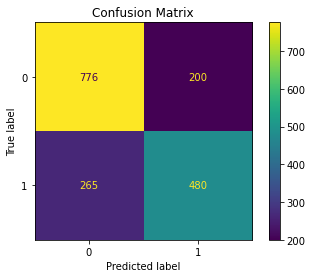

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion matrix (variable name)
cm = confusion_matrix(y_test, # test data
                      y_pred_lr, # predictions
                      labels=[0,1] # class labels from the knn model
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm, # pass through the created confusion matrix
                              display_labels=[0,1] # class labels from the knn model 
                             )

disp.plot()

plt.title("Confusion Matrix")
plt.show()

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))
print("Precision:",metrics.precision_score(y_test, y_pred_lr))
print("Recall:",metrics.recall_score(y_test, y_pred_lr))
precision_lr = metrics.precision_score(y_test, y_pred_lr)
recall_lr = metrics.recall_score(y_test, y_pred_lr)
f1_lr=(2*precision_lr*recall_lr)/(precision_lr+recall_lr)
print("F1:",f1_lr)

Accuracy: 0.7298082510168507
Precision: 0.7058823529411765
Recall: 0.6442953020134228
F1: 0.6736842105263158


AUC：0.8044683133458026


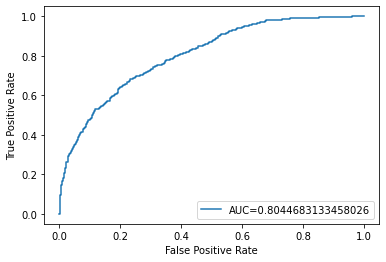

In [47]:
#AUC
y_pred_proba_lr = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_lr)
auc_lr = metrics.roc_auc_score(y_test, y_pred_proba_lr)
print("AUC："+str(auc_lr))

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_lr))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Decision Tree

In [48]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=lr.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(y_pred_dt,y_test))

The accuracy of the Decision Tree is 0.7298082510168507


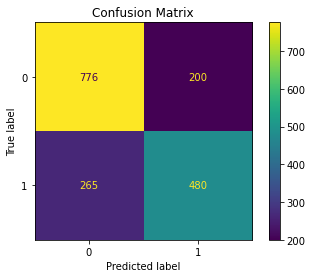

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion matrix (variable name)
cm = confusion_matrix(y_test, # test data
                      y_pred_dt, # predictions
                      labels=[0,1] # class labels from the knn model
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm, # pass through the created confusion matrix
                              display_labels=[0,1] # class labels from the knn model 
                             )

disp.plot()

plt.title("Confusion Matrix")
plt.show()

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:",metrics.precision_score(y_test, y_pred_dt))
print("Recall:",metrics.recall_score(y_test, y_pred_dt))
precision_dt = metrics.precision_score(y_test, y_pred_dt)
recall_dt = metrics.recall_score(y_test, y_pred_dt)
f1_dt=(2*precision_dt*recall_dt)/(precision_dt+recall_dt)
print("F1:",f1_dt)

Accuracy: 0.7298082510168507
Precision: 0.7058823529411765
Recall: 0.6442953020134228
F1: 0.6736842105263158


AUC：0.7739279623720982


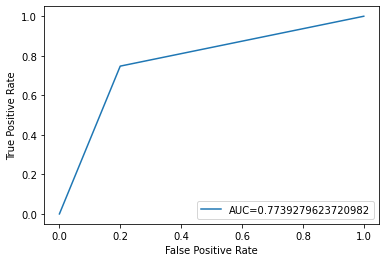

In [51]:
#AUC
y_pred_proba_dt = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_dt)
auc_dt = metrics.roc_auc_score(y_test, y_pred_proba_dt)
print("AUC："+str(auc_dt))

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_dt))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
print('The accuracy of the Random Forest is',metrics.accuracy_score(y_pred_rf,y_test))

The accuracy of the Random Forest is 0.8227774549680419


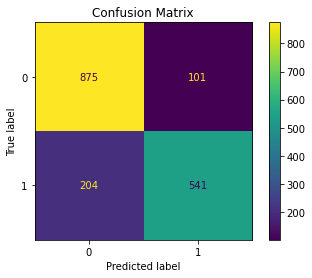

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion matrix (variable name)
cm = confusion_matrix(y_test, # test data
                      y_pred_rf, # predictions
                      labels=[0,1] # class labels from the knn model
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm, # pass through the created confusion matrix
                              display_labels=[0,1] # class labels from the knn model 
                             )

disp.plot()

plt.title("Confusion Matrix")
plt.show()

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test, y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf))
precision_rf = metrics.precision_score(y_test, y_pred_rf)
recall_rf = metrics.recall_score(y_test, y_pred_rf)
f1_rf=(2*precision_rf*recall_rf)/(precision_rf+recall_rf)
print("F1:",f1_rf)

Accuracy: 0.8227774549680419
Precision: 0.8426791277258567
Recall: 0.7261744966442953
F1: 0.7801009372746937


AUC:0.9236831609638024


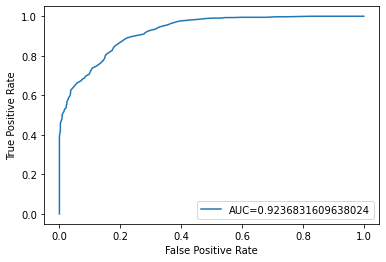

In [55]:
#AUC
y_pred_proba_rf = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_rf)
auc_rf = metrics.roc_auc_score(y_test, y_pred_proba_rf)
print("AUC:"+str(auc_rf))

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_rf))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()